In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

# Display the CITY_data table for preview
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
# Exploring City Data
city_data_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [3]:
# Display the RIDE_data table for preview
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Explore Ride Data
# ride_id is always unique which commands the length of DF. 

ride_data_df['ride_id'].value_counts().head()

2120999202624    1
6031755734913    1
8758071332545    1
4642968219429    1
2565031924407    1
Name: ride_id, dtype: int64

In [5]:
# Combine the data into a single dataset

In [6]:
# Use the left join. There are ZERO nulls. 
full_data_df = pd.merge(ride_data_df, city_data_df, on='city', how="left")

In [7]:
full_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
## Get separate DFs for each city type
urban_city_type = full_data_df[full_data_df["type"] == "Urban"].groupby(["city"])
rural_city_type = full_data_df[full_data_df["type"] == "Rural"].groupby(["city"])
suburban_city_type = full_data_df[full_data_df["type"] == "Suburban"].groupby(["city"])

In [9]:
## Find x and y axis for Urban
## x = total rides, y = average fare

x_urban = urban_city_type['ride_id'].count()
y_urban = urban_city_type['fare'].mean()

## S is to determine the size of the bubble which depends on the 
## number of drivers in the city. 
s_urban = urban_city_type['driver_count'].mean()

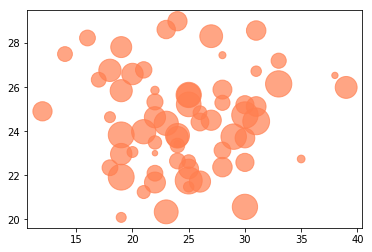

In [10]:
## check plot
plt.scatter(x_urban, y_urban, s=s_urban*10,
           c="Coral", alpha=0.7, marker='o')

In [11]:
## Find x and y axis for Rural
## x = total rides, y = average fare

x_rural = rural_city_type['ride_id'].count()
y_rural = rural_city_type['fare'].mean()

## S is to determine the size of the bubble which depends on the 
## number of drivers in the city. 
s_rural = rural_city_type['driver_count'].mean()

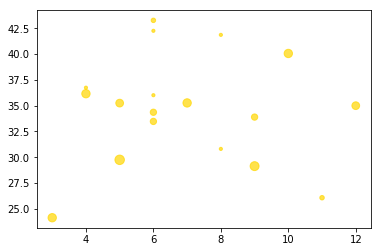

In [12]:
## check plot
plt.scatter(x_rural, y_rural, s=s_rural*10,
           c="Gold", alpha=0.7, marker='o')

In [13]:
## Find x and y axis for Rural
## x = total rides, y = average fare

x_suburban = suburban_city_type['ride_id'].count()
y_suburban = suburban_city_type['fare'].mean()

## S is to determine the size of the bubble which depends on the 
## number of drivers in the city. 
s_suburban = suburban_city_type['driver_count'].mean()

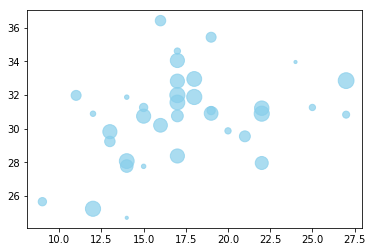

In [14]:
## check plot
plt.scatter(x_suburban, y_suburban, s=s_suburban*10,
           c="SkyBlue", alpha=0.7, marker='o')

Text(42, 35, 'Note: \nCircle size correlates with driver count per city.')

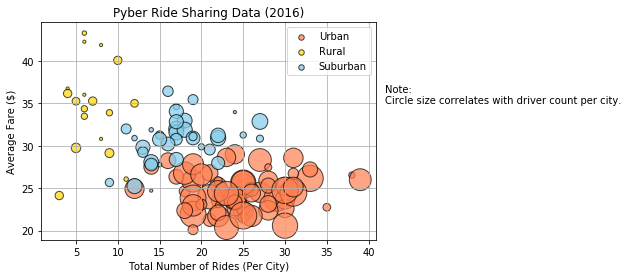

In [17]:
## Put graphs together
plt.scatter(x_urban, y_urban, s=s_urban*10, c="Coral", alpha=0.7, marker='o', edgecolor = 'black')
plt.scatter(x_rural, y_rural, s=s_rural*10, c="Gold", alpha=0.7, marker='o', edgecolor = 'black')
plt.scatter(x_suburban, y_suburban, s=s_suburban*10, c="SkyBlue", alpha=0.75, marker='o', edgecolor = 'black')
plt.grid()

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Created list of labels for legend
labels = ['Urban', 'Rural','Suburban']

# Needed to create legend variable to be able to change handle size
legend = plt.legend(labels)

# The code below changes the handle size
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

## Prints text to add the note
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

In [16]:
## Pie chart to show Percentage of Total Fares by City Type

# Needed to group by type 
full_grouped_fare = full_data_df.groupby(['type'])
# Then get the sum for each city type
fare_sum = full_grouped_fare['fare'].sum()
fare_sum


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

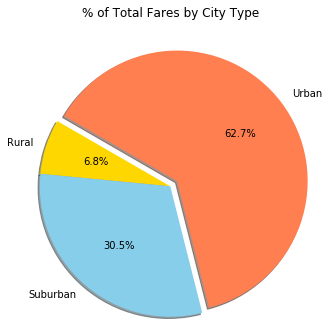

In [83]:
# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["Gold", "Skyblue", "Coral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, 
        startangle=150, radius = 1.5)
fare_title = plt.title("% of Total Fares by City Type", y = 1.25)

In [58]:
## Pie chart to show Percentage of Total Rides by City Type

# Needed to group by type 
full_grouped_ride = full_data_df.groupby(['type'])
# Then get the sum for each city type
ride_sum = full_grouped['ride_id'].count()
ride_sum


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

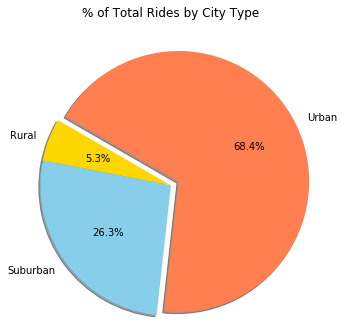

In [84]:
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["Gold", "Skyblue", "Coral"]
plt.pie(ride_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, 
        startangle=150, radius = 1.5)

ride_title = plt.title("% of Total Rides by City Type", y=1.25)

In [71]:
## Pie chart to show Percentage of Total Rides by City Type

# Needed to group by type 
full_grouped_driver = city_data_df.groupby(['type'])
# Then get the sum for each city type
driver_sum = full_grouped_driver['driver_count'].sum()
driver_sum

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

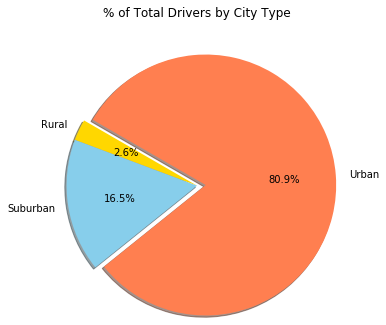

In [86]:
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["Gold", "Skyblue", "Coral"]
plt.pie(driver_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, 
        startangle=150, radius=1.5)
driver_title = plt.title("% of Total Drivers by City Type", y = 1.25)